In [65]:
import pandas as pd
import root_pandas as rp
import numpy as np
import matplotlib.pyplot as plt
from new_analysis import analysis

a = analysis()

[8.37997868e-05 3.37988827e-05 5.00088804e-05]
[3.74777118e-05 2.38994889e-05 2.88727580e-05]
[8.37997868e-05 3.37988827e-05 5.00088804e-05]
[3.74777118e-05 2.38994889e-05 2.88727580e-05]
[]
[]
[5.01457891e-04 3.84122637e-04 2.84119432e-04 3.81172793e-04
 4.43024549e-04 1.62668696e-04 2.58406331e-04 2.95851253e-04
 9.64328921e-05 1.52748356e-04 2.11099678e-04 2.00580743e-04
 2.67123425e-04 2.01944254e-04 6.98559346e-05 1.43328824e-04
 1.12065908e-04 1.54003478e-04 1.19506282e-04 1.22076234e-04
 1.26596500e-04 2.62618109e-04 1.81469035e-04 1.83500546e-04
 2.44959652e-04 2.02343099e-04 1.53906896e-04 6.70377833e-05
 1.33356746e-04 2.00354232e-04 1.02195730e-04 7.31240009e-05
 1.12450749e-04 7.62461466e-05 7.79599781e-05 1.21570474e-04
 2.07538032e-04 1.30392651e-04 8.83326374e-05 9.20361437e-05
 9.34305665e-05 1.83726880e-04 8.35261436e-05 1.83836192e-04
 2.73182750e-04 7.08408296e-05 1.09177769e-04 9.49142286e-05
 9.85650337e-05 8.11411091e-05 1.25649530e-04 1.30580942e-04
 8.89145023e-

[3.35991267e-05 3.34940588e-05 5.01357251e-05]
[2.37585962e-05 2.36838797e-05 2.89459935e-05]
[3.56469748e-05 4.28807149e-05 5.88603337e-05 7.05351644e-05
 1.19772394e-04]
[2.52094952e-05 3.03380985e-05 3.39865552e-05 4.98759804e-05
 8.47005654e-05]
[0.00204638 0.00179487 0.00159274 0.00177807 0.00155917 0.00191983
 0.00210088 0.00299149 0.00393882 0.00260319 0.00256072 0.00231741
 0.00462043 0.00112237 0.00147517 0.00169322 0.00162072 0.00179703
 0.00213754 0.00176508 0.00289026 0.00270084 0.00214303 0.00192976
 0.00245873 0.00194798 0.00257854 0.00109359 0.00277653 0.00351878
 0.00247859 0.00434452 0.00538697 0.00415308 0.00381659 0.00341411
 0.00464657 0.00238813]
[0.00018551 0.00017377 0.00016357 0.00017292 0.00016184 0.0002909
 0.00031242 0.00041431 0.00051962 0.00043671 0.00046154 0.00046229
 0.00071869 0.00035508 0.00015738 0.00016863 0.00016819 0.00024172
 0.00027914 0.0002646  0.00036703 0.00037299 0.00035187 0.00034637
 0.00041958 0.00039318 0.00047817 0.00031584 0.00030526 0

In [66]:
df = a.get_raw_study_data()

In [67]:
df.columns

Index(['ts', 'I_HER', 'I_LER', 'P_HER', 'P_LER', 'Sy_HER', 'Sy_LER',
       'ECL_lumi', 'LER_study_flag', 'HER_study_flag', 'Lumi_study_flag',
       'Cont_inj_flag', 'Decay_flag', 'Nb_HER', 'Nb_LER', 'tako_neutrons',
       'palila_neutrons', 'elepaio_neutrons', 'iiwi_neutrons', 'nene_neutrons',
       'humu_neutrons'],
      dtype='object')

In [68]:
df['time'] = (df['ts']-df.loc[df['LER_study_flag']==1]['ts'].min())/3600

In [78]:
nsecs = 30
nbins = int(np.floor((df['ts'].max()-df['ts'].min())/nsecs))

In [79]:
avgs0 = df.groupby(pd.cut(df['ts'], bins = np.linspace(df['ts'].min(),df['ts'].max(),nbins))).mean()
errs0 = df.groupby(pd.cut(df['ts'], bins = np.linspace(df['ts'].min(),df['ts'].max(),nbins))).sem()

In [80]:
avgs = {}
errs = {}
avgs['bwd'] = avgs0.loc[((avgs0['Lumi_study_flag'] == 1) | (avgs0['LER_study_flag'] == 1) | (avgs0['HER_study_flag'] == 1)) & ((avgs0['palila_neutrons']!=0) | (avgs0['tako_neutrons']!=0) | (avgs0['elepaio_neutrons']!=0))]
avgs['fwd'] = avgs0.loc[((avgs0['Lumi_study_flag'] == 1) | (avgs0['LER_study_flag'] == 1) | (avgs0['HER_study_flag'] == 1)) & ((avgs0['iiwi_neutrons']!=0) | (avgs0['nene_neutrons']!=0) | (avgs0['humu_neutrons']!=0))]
errs['bwd'] = errs0.loc[((avgs0['Lumi_study_flag'] == 1) | (avgs0['LER_study_flag'] == 1) | (avgs0['HER_study_flag'] == 1)) & ((avgs0['palila_neutrons']!=0) | (avgs0['tako_neutrons']!=0) | (avgs0['elepaio_neutrons']!=0))]
errs['fwd'] = errs0.loc[((avgs0['Lumi_study_flag'] == 1) | (avgs0['LER_study_flag'] == 1) | (avgs0['HER_study_flag'] == 1)) & ((avgs0['iiwi_neutrons']!=0) | (avgs0['nene_neutrons']!=0) | (avgs0['humu_neutrons']!=0))]

In [81]:
tmp = df.loc[(df['Lumi_study_flag'] == 1) | (df['LER_study_flag'] == 1) | (df['HER_study_flag'] == 1)]

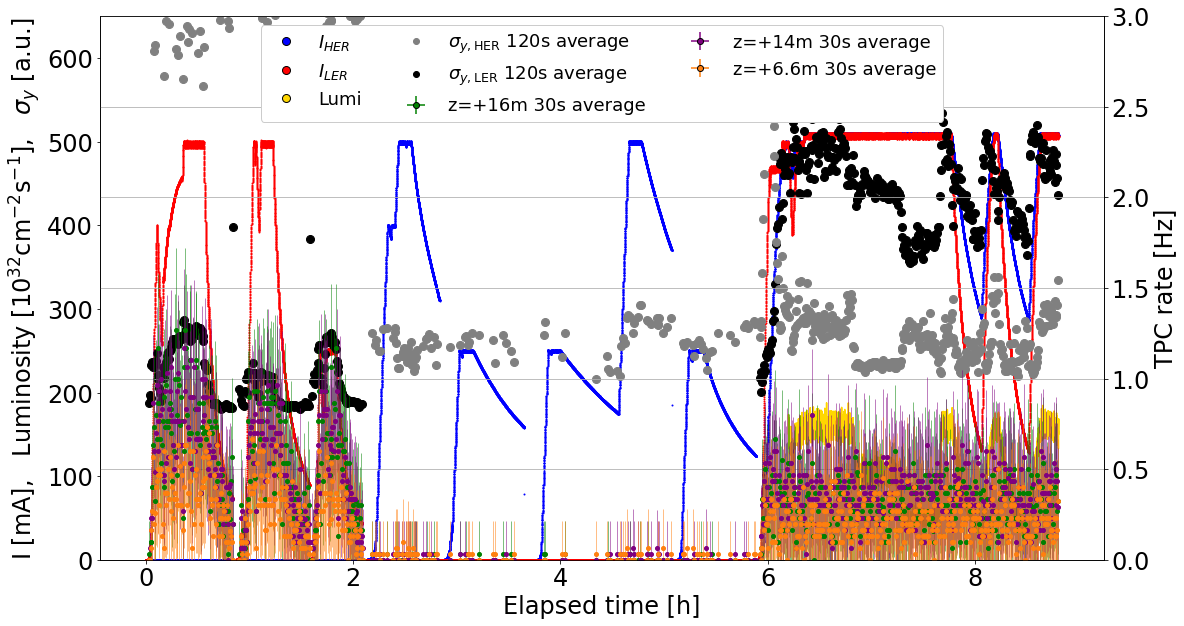

In [82]:
import matplotlib.ticker as ticker
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

key = 'fwd'

fig, ax = plt.subplots(figsize=(18,10))

ax.plot(tmp['time'],tmp['I_HER'], 'o', color = 'blue', label = r'$I_{HER}$',zorder=1e9,markersize=1)
ax.plot(tmp['time'],tmp['I_LER'], 'o', color = 'red', label = r'$I_{LER}$',zorder=1e9,markersize=1)
ax.plot(tmp.loc[tmp['time']>6.2]['time'],tmp.loc[tmp['time']>6.2]['ECL_lumi']/100, color = 'gold',zorder=1e9,markersize=1)
ax.plot(avgs[key]['time'],avgs[key]['Sy_LER']*7.5, 'o', color = 'k',zorder=1e9,markersize=8,alpha=1)
ax.plot(avgs[key]['time'],avgs[key]['Sy_HER']*7.5, 'o', color = 'gray',zorder=1e9,markersize=8,alpha=1)

#ax.plot(avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['sy_LER'], 'o', markersize = 1, lw =1 ,color = 'black',zorder=1e9)
#ax.plot(avgs[key].loc[(avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['both_inj']==1)]['sy_HER'], color = 'grey',zorder=1e9,label = r'$\sigma_{y,HER}$')
ax.set_xlabel('Elapsed time [h]')
ax.set_ylim(0,650)
ax2 = ax.twinx()
ax2.errorbar(avgs[key]['time'],(avgs[key]['humu_neutrons']), np.sqrt(errs[key]['humu_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'green',markersize=4,lw=0.5)
ax2.errorbar(avgs[key]['time'],(avgs[key]['nene_neutrons']), np.sqrt(errs[key]['nene_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=4,lw=0.5)
ax2.errorbar(avgs[key]['time'],(avgs[key]['iiwi_neutrons']), np.sqrt(errs[key]['iiwi_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'tab:orange',markersize=4,lw=0.5)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['elepaio_neutrons'] + avgs[key]['tako_neutrons'] + avgs[key]['palila_neutrons'])/3, np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2)/3, [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=2,lw=0.5, label='BWD tunnel %ss average'%(nsecs))
ax2.plot([0],[-20],'o',color='blue',label = r'$I_{HER}$',markersize=8,markeredgecolor='k')
ax2.plot([0],[-20],'o',color='red',label = r'$I_{LER}$',markersize=8,markeredgecolor='k')
ax2.plot([0],[-20],'o',color='gold',markersize=8,markeredgecolor='k',label = r'Lumi')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'green', label = 'z=+16m %ss average'%(nsecs),markeredgecolor='k')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'purple', label = 'z=+14m %ss average'%(nsecs),markeredgecolor='k')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'tab:orange', label = 'z=+6.6m %ss average'%(nsecs),markeredgecolor='k')
ax2.plot([0],[-20],'o',color='gray',label = r'$\sigma_{y\mathrm{ ,HER}}$ 120s average')
ax2.plot([0],[-20],'o',color='k',label = r'$\sigma_{y\mathrm{ ,LER}}$ 120s average')
ax2.plot([0],[-20],)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['palila_neutrons']), np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=1,lw=0.5, label='BWD tunnel 60s average')

ax.set_ylabel(r'I [mA],   Luminosity [$10^{32}\mathrm{cm}^{-2}\mathrm{s}^{-1}$],   $\sigma_y$ [a.u.]')
ax2.set_ylabel('TPC rate [Hz]')
#ax2.set_yscale('log')
ax2.set_ylim(0,3)
#ax2.set_yticks([0,3,6,9,12,15])
ax2.yaxis.set_minor_locator(ticker.IndexLocator(base=1,offset=0))

#ax2.set_ylim(0,1)
ax2.legend(loc ='upper center',ncol = 3,framealpha=1)
ax2.grid(axis='y',which='major')
ax2.grid(axis='y',which='minor',linestyle='--',alpha=0.4)
plt.savefig('BG_study_FWD_tunnel_summary_time.jpg',dpi=200)

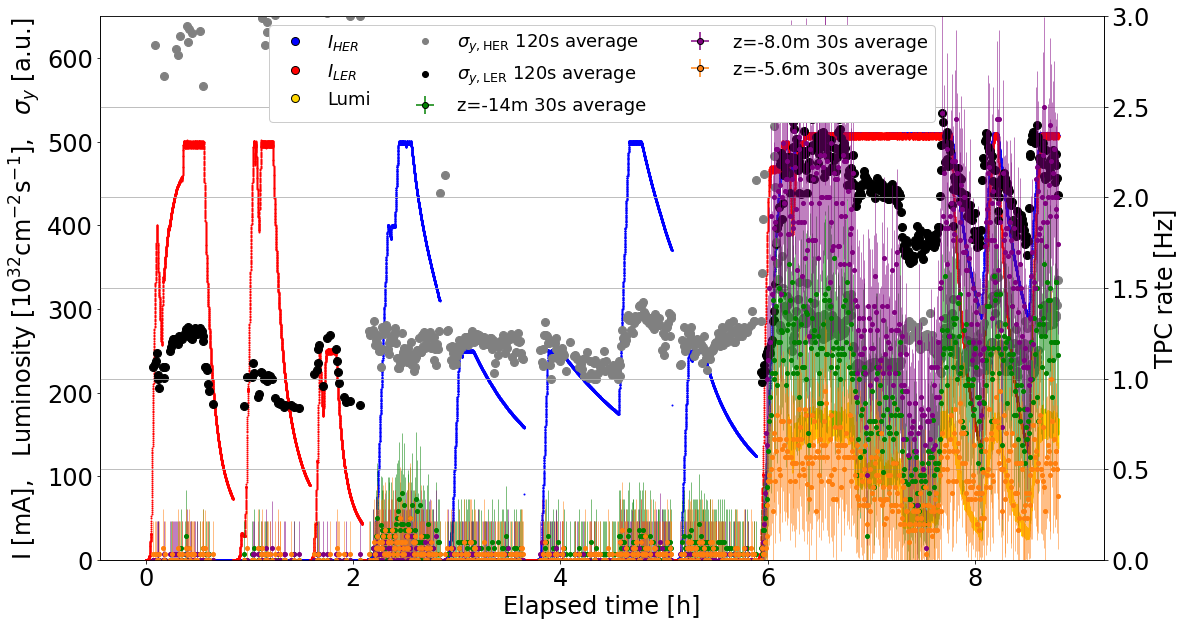

In [83]:
import matplotlib.ticker as ticker
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

key = 'bwd'

fig, ax = plt.subplots(figsize=(18,10))

ax.plot(tmp['time'],tmp['I_HER'], 'o', color = 'blue', label = r'$I_{HER}$',zorder=1e9,markersize=1)
ax.plot(tmp['time'],tmp['I_LER'], 'o', color = 'red', label = r'$I_{LER}$',zorder=1e9,markersize=1)
ax.plot(tmp.loc[tmp['time']>6.2]['time'],tmp.loc[tmp['time']>6.2]['ECL_lumi']/100, color = 'gold',zorder=1e9,markersize=1)
ax.plot(avgs[key]['time'],avgs[key]['Sy_LER']*7.5, 'o', color = 'k',zorder=1e9,markersize=8,alpha=1)
ax.plot(avgs[key]['time'],avgs[key]['Sy_HER']*7.5, 'o', color = 'gray',zorder=1e9,markersize=8,alpha=1)

#ax.plot(avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['sy_LER'], 'o', markersize = 1, lw =1 ,color = 'black',zorder=1e9)
#ax.plot(avgs[key].loc[(avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['both_inj']==1)]['sy_HER'], color = 'grey',zorder=1e9,label = r'$\sigma_{y,HER}$')
ax.set_xlabel('Elapsed time [h]')
ax.set_ylim(0,650)
ax2 = ax.twinx()
ax2.errorbar(avgs[key]['time'],(avgs[key]['elepaio_neutrons']), np.sqrt(errs[key]['elepaio_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'green',markersize=4,lw=0.5)
ax2.errorbar(avgs[key]['time'],(avgs[key]['tako_neutrons']), np.sqrt(errs[key]['tako_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=4,lw=0.5)
ax2.errorbar(avgs[key]['time'],(avgs[key]['palila_neutrons']), np.sqrt(errs[key]['palila_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'tab:orange',markersize=4,lw=0.5)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['elepaio_neutrons'] + avgs[key]['tako_neutrons'] + avgs[key]['palila_neutrons'])/3, np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2)/3, [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=2,lw=0.5, label='BWD tunnel %ss average'%(nsecs))
ax2.plot([0],[-20],'o',color='blue',label = r'$I_{HER}$',markersize=8,markeredgecolor='k')
ax2.plot([0],[-20],'o',color='red',label = r'$I_{LER}$',markersize=8,markeredgecolor='k')
ax2.plot([0],[-20],'o',color='gold',markersize=8,markeredgecolor='k',label = r'Lumi')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'green', label = 'z=-14m %ss average'%(nsecs),markeredgecolor='k')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'purple', label = 'z=-8.0m %ss average'%(nsecs),markeredgecolor='k')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'tab:orange', label = 'z=-5.6m %ss average'%(nsecs),markeredgecolor='k')
ax2.plot([0],[-20],'o',color='gray',label = r'$\sigma_{y\mathrm{ ,HER}}$ 120s average')
ax2.plot([0],[-20],'o',color='k',label = r'$\sigma_{y\mathrm{ ,LER}}$ 120s average')
ax2.plot([0],[-20],)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['palila_neutrons']), np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=1,lw=0.5, label='BWD tunnel 60s average')

ax.set_ylabel(r'I [mA],   Luminosity [$10^{32}\mathrm{cm}^{-2}\mathrm{s}^{-1}$],   $\sigma_y$ [a.u.]')
ax2.set_ylabel('TPC rate [Hz]')
#ax2.set_yscale('log')
ax2.set_ylim(0,3)
#ax2.set_yticks([0,3,6,9,12,15])
ax2.yaxis.set_minor_locator(ticker.IndexLocator(base=1,offset=0))

#ax2.set_ylim(0,1)
ax2.legend(loc ='upper center',ncol = 3,framealpha=1)
ax2.grid(axis='y',which='major')
ax2.grid(axis='y',which='minor',linestyle='--',alpha=0.4)
plt.savefig('BG_study_BWD_tunnel_summary_time.jpg',dpi=200)

In [84]:
tmp = df.loc[(df['LER_study_flag'] == 1)]

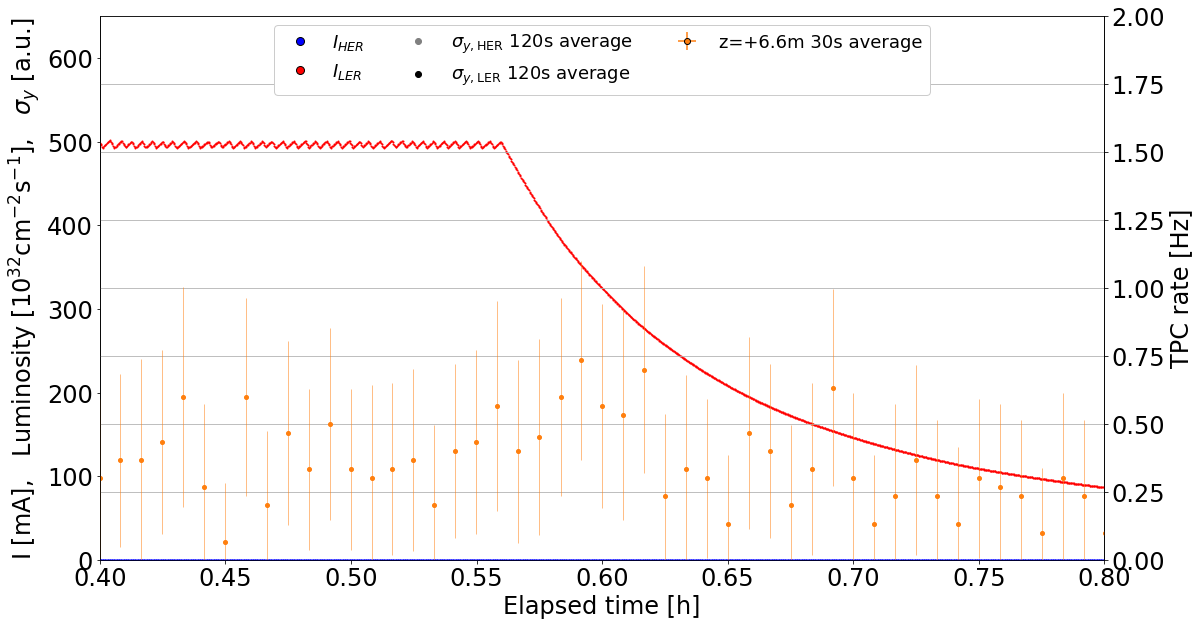

In [86]:
import matplotlib.ticker as ticker
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

key = 'fwd'
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(tmp['time'],tmp['I_HER'], 'o', color = 'blue', label = r'$I_{HER}$',zorder=1e9,markersize=1)
ax.plot(tmp['time'],tmp['I_LER'], 'o', color = 'red', label = r'$I_{LER}$',zorder=1e9,markersize=1)

#ax.plot(avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['LER_inj']==1) | (avgs[key]['LER_decay']==1) | (avgs[key]['both_inj']==1)]['sy_LER'], 'o', markersize = 1, lw =1 ,color = 'black',zorder=1e9)
#ax.plot(avgs[key].loc[(avgs[key]['both_inj']==1)]['time'],avgs[key].loc[(avgs[key]['both_inj']==1)]['sy_HER'], color = 'grey',zorder=1e9,label = r'$\sigma_{y,HER}$')
ax.set_xlabel('Elapsed time [h]')
ax.set_ylim(0,650)
ax.set_xlim(0.4,0.8)
ax2 = ax.twinx()
#ax2.errorbar(avgs[key]['time'],(avgs[key]['humu_neutrons']), np.sqrt(errs[key]['humu_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'green',markersize=4,lw=0.5)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['nene_neutrons']), np.sqrt(errs[key]['nene_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=4,lw=0.5)
ax2.errorbar(avgs[key]['time'],(avgs[key]['iiwi_neutrons']), np.sqrt(errs[key]['iiwi_neutrons']), [0 for i in range(0,len(avgs[key]))],  'o', color = 'tab:orange',markersize=4,lw=0.5)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['elepaio_neutrons'] + avgs[key]['tako_neutrons'] + avgs[key]['palila_neutrons'])/3, np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2)/3, [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=2,lw=0.5, label='BWD tunnel %ss average'%(nsecs))
ax2.plot([0],[-20],'o',color='blue',label = r'$I_{HER}$',markersize=8,markeredgecolor='k')
ax2.plot([0],[-20],'o',color='red',label = r'$I_{LER}$',markersize=8,markeredgecolor='k')
ax2.errorbar([0],[-20],[0],[0],'o',color = 'tab:orange', label = 'z=+6.6m %ss average'%(nsecs),markeredgecolor='k')
ax2.plot([0],[-20],'o',color='gray',label = r'$\sigma_{y\mathrm{ ,HER}}$ 120s average')
ax2.plot([0],[-20],'o',color='k',label = r'$\sigma_{y\mathrm{ ,LER}}$ 120s average')
ax2.plot([0],[-20],)
#ax2.errorbar(avgs[key]['time'],(avgs[key]['palila_neutrons']), np.sqrt(errs[key]['elepaio_neutrons']**2 + errs[key]['tako_neutrons']**2 + errs[key]['palila_neutrons']**2), [0 for i in range(0,len(avgs[key]))],  'o', color = 'purple',markersize=1,lw=0.5, label='BWD tunnel 60s average')

ax.set_ylabel(r'I [mA],   Luminosity [$10^{32}\mathrm{cm}^{-2}\mathrm{s}^{-1}$],   $\sigma_y$ [a.u.]')
ax2.set_ylabel('TPC rate [Hz]')
#ax2.set_yscale('log')
ax2.set_ylim(0,2)
#ax2.set_yticks([0,3,6,9,12,15])
ax2.yaxis.set_minor_locator(ticker.IndexLocator(base=1,offset=0))

#ax2.set_ylim(0,1)
ax2.legend(loc ='upper center',ncol = 3,framealpha=1)
ax2.grid(axis='y',which='major')
ax2.grid(axis='y',which='minor',linestyle='--',alpha=0.4)